### Курсовой проект для курса "Python для Data Science"

Материалы к проекту (файлы):
train.csv
test.csv

Задание:
Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).

Целевая переменная:
Price

Метрика качества:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Требования к решению:
1. R2 > 0.6
2. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}_solution.ipynb, пример SShirkin_solution.ipynb
3. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}_predictions.csv, пример SShirkin_predictions.csv 
Файл должен содержать два поля: Id, Price и в файле должна быть 5001 строка (шапка + 5000 предсказаний).

Сроки сдачи:
Cдать проект нужно в течение 72 часов после окончания последнего вебинара. Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества. Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

Рекомендации для файла с кодом (ipynb):
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

Описание датасета:
- Id - идентификационный номер квартиры
- DistrictId - идентификационный номер района
- Rooms - количество комнат
- Square - площадь
- LifeSquare - жилая площадь
- KitchenSquare - площадь кухни
- Floor - этаж
- HouseFloor - количество этажей в доме
- HouseYear - год постройки дома
- Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
- Social_1, Social_2, Social_3 - социальные показатели местности
- Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
- Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
- Price - цена квартиры

In [1152]:
import pandas as pd
import numpy as np

In [1153]:
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1100]:
import warnings
warnings.filterwarnings('ignore')

In [1101]:
houses_train = pd.read_csv('./train.csv')

In [1102]:
houses_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


#### Проверим типы признаков:

In [1103]:
houses_train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

#### Заменим типы для признаков:
- Rooms &#8594; int64
- HouseFloor &#8594;int64

In [1104]:
houses_train['Rooms'] = houses_train['Rooms'].astype('int')
houses_train['HouseFloor'] = houses_train['HouseFloor'].astype('int')

In [1105]:
print(f"Rooms: {houses_train.dtypes['Rooms']}, HouseFloor: {houses_train.dtypes['HouseFloor']}")

Rooms: int64, HouseFloor: int64


In [1106]:
houses_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


#### Проверим признаки с типом object

In [1107]:
houses_train_obj = houses_train.select_dtypes(include='object')
houses_train_obj.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [1108]:
houses_train_obj['Ecology_2'].value_counts(0)

B    9903
A      97
Name: Ecology_2, dtype: int64

In [1109]:
houses_train_obj['Ecology_3'].value_counts(0)

B    9725
A     275
Name: Ecology_3, dtype: int64

In [1110]:
houses_train_obj['Shops_2'].value_counts(0)

B    9175
A     825
Name: Shops_2, dtype: int64

Проверим корректность данных в колонках, описывающих площадь: *Square*, *LifeSquare*, *KitchenSquare*. Признак *Square* должен быть больше чем *LifeSquare* и *KitchenSquare*. 

In [1111]:
# LifeSquare > Square
houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1,42.530043,43.967759,1.0,3,9,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3,104.211396,106.340403,0.0,20,0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2,61.400054,65.224603,0.0,17,22,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3,85.952306,89.803753,1.0,4,3,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1,51.831473,53.491301,1.0,5,1,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,41,30,2,59.015896,59.439082,12.0,5,5,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B,126281.142781
9889,12918,23,2,51.440463,53.134243,51.0,3,17,2017,0.005767,B,B,1,388,0,NaN,0,0,B,88150.012510
9895,2737,27,3,123.430072,125.806981,123.0,5,10,2015,0.017647,B,B,2,469,0,NaN,0,0,B,234194.837047
9902,14001,73,1,44.098768,44.267551,1.0,7,24,2014,0.042032,B,B,37,6856,84,1940.0,2,5,B,381937.404161


Предположим, что здесь они просто перепутаны и поменяем их местами, т.е. сделаем 
Square, LifeSquare = LifeSquare, Square

In [1112]:
h1 = houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square']), ['LifeSquare']]
h2 = houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square']), ['Square']]
houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square']), ['Square']] = h1
houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square']), ['LifeSquare']] = h2

In [1113]:
# Проверим результат замены, должно быть 0 строк
houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Проверим признаки KitchenSquare и Square, Square должно быть всегда больше KitchenSquare

In [1114]:
houses_train.loc[(houses_train['KitchenSquare'] > houses_train['Square'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1,47.100719,46.447960,2014.0,4,1,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
5149,13703,42,1,38.071692,19.723548,73.0,9,10,2006,0.158249,B,B,21,5731,0,NaN,1,0,B,160488.033165
7088,6569,27,1,38.220258,18.716856,84.0,4,17,2018,0.011654,B,B,4,915,0,NaN,0,0,B,99079.960518
8584,14679,81,1,32.276663,19.278394,1970.0,6,1,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


В строках с id 13703 и 6569 проделаем то же самое. что и для признака LifeSquare, то есть поменяем местами значения KitchenSquare и Square. В строках с id 14656 и 14679 явно присутсвует ошибка, значение площади кухни слишком большое - это выбросы, их рассмотрим потом отдельно, вместе со всеми выбросами.

In [1115]:
h1 = houses_train.loc[(houses_train['KitchenSquare'] > houses_train['Square']) & (houses_train['KitchenSquare'] < houses_train['Square'].max()), ['KitchenSquare']]
h2 = houses_train.loc[(houses_train['KitchenSquare'] > houses_train['Square']) & (houses_train['KitchenSquare'] < houses_train['Square'].max()), ['Square']]
houses_train.loc[(houses_train['KitchenSquare'] > houses_train['Square']) & (houses_train['KitchenSquare'] < houses_train['Square'].max()), ['Square']] = h1
houses_train.loc[(houses_train['KitchenSquare'] > houses_train['Square']) & (houses_train['KitchenSquare'] < houses_train['Square'].max()), ['KitchenSquare']] = h2

In [1116]:
# Проверим результат замены, должно быть 2 строки (так как пока не учли выбросы)
houses_train.loc[(houses_train['KitchenSquare'] > houses_train['Square'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1,47.100719,46.447960,2014.0,4,1,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
8584,14679,81,1,32.276663,19.278394,1970.0,6,1,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


#### Обработка выбросов
Проверим основные показатели по каждому признаку, вызовем метод describe()

In [1117]:
houses_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,9516.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.197270,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,20.555229,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,2.377248,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.824933,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.462026,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.841734,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


В признаках LifeSquare и KitchenSquare максимальные значения очень большие. Учитывая, что максимальное значение признака Square = 641.06, а значения признаков LifeSquare и KitchenSquare не должно превышать этого значения, выведем строки, в которых LifeSquare и KitchenSquare больше 641:

In [1118]:
houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square'].max()) | (houses_train['KitchenSquare'] > houses_train['Square'].max()), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1,47.100719,46.447960,2014.0,4,1,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
4328,16550,27,3,NaN,7480.592129,1.0,9,17,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366
8584,14679,81,1,32.276663,19.278394,1970.0,6,1,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


Так как в этих строках отсутствует значение Square, но значение жилой и кухоной площадей явно велико - заменим  эти значения на соответствующие медианные:

In [1119]:
houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square'].max()), 'LifeSquare'] = houses_train['LifeSquare'].median()

In [1120]:
houses_train.loc[(houses_train['KitchenSquare'] > houses_train['Square'].max()), 'KitchenSquare'] = houses_train['KitchenSquare'].median()

In [1121]:
# Проверим результат замены, должно быть 0 строк
houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square'].max()) | (houses_train['KitchenSquare'] > houses_train['Square'].max()), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Проверим снова основные показатели, вызовем метод describe()

In [1122]:
houses_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,9516.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.197270,36.255330,5.876100,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,20.555229,20.273876,5.174014,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,2.377248,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.824933,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.462026,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.841734,45.125018,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,638.163193,123.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Следующий признак с аномальными данными - HouseYear (год постройки), максимальное значение 20052011, выведем строки со значением HouseYear большим чем текущий год - 2020

In [1123]:
houses_train[(houses_train['HouseYear'] > 2020)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1,37.265070,20.239714,9.0,9,12,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2,44.791836,28.360393,5.0,4,9,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


По id 10814 можно предположить, что вместо года ввели полную дату - 20.05.2011, заменим это значение на 2011: 

In [1124]:
houses_train.loc[(houses_train['HouseYear'] == 20052011), 'HouseYear'] = 2011

По id 11607 можно предположить, что ошибка в первой цифре, замени 4968 на 1968: 

In [1125]:
houses_train.loc[(houses_train['HouseYear'] == 4968), 'HouseYear'] = 1968

In [1126]:
houses_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,9516.000000,7887.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.197270,36.255330,5.876100,8.526700,12.609400,1984.866300,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,20.555229,20.273876,5.174014,5.241148,6.775974,18.412271,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,2.377248,0.370619,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.824933,22.769832,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.462026,32.781260,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.841734,45.125018,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,638.163193,123.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### Обработка пропусков
Проверим количество значений по каждому признаку, вызовем метод info()

In [1127]:
houses_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  int64  
 3   Square         9516 non-null   float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  int64  
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Есть пропуски в значениях Square, LifeSquare и Healthcare_1.

Заменим недостающие значения по признаку Square на медианные, однако при этом необходимо учесть, что Square должно быть больше чем LifeSquare и KitchenSquare. Если после замены найдутся такие строки, увеличим значения Square в них до максимального между LifeSquare и KitchenSquare в этой же строке.

In [1128]:
houses_train.loc[houses_train['Square'].isna(), 'Square'] = houses_train['Square'].median()
houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square']) | (houses_train['KitchenSquare'] > houses_train['Square'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
44,10521,38,3,52.462026,106.340403,0.0,20,0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2,52.462026,65.224603,0.0,17,22,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3,52.462026,89.803753,1.0,4,3,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1,52.462026,53.491301,1.0,5,1,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284
212,1748,88,2,52.462026,67.628717,1.0,24,22,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9878,11441,62,2,52.462026,72.453232,0.0,5,0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,158841.624543
9884,41,30,2,52.462026,59.439082,12.0,5,5,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B,126281.142781
9889,12918,23,2,52.462026,53.134243,51.0,3,17,2017,0.005767,B,B,1,388,0,NaN,0,0,B,88150.012510
9895,2737,27,3,52.462026,125.806981,123.0,5,10,2015,0.017647,B,B,2,469,0,NaN,0,0,B,234194.837047


In [1129]:
# Заменяем для LifeSquare > Square
square_1 = houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square']), ['KitchenSquare', 'LifeSquare']].max(axis=1)
houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square']), 'Square'] = square_1

In [1130]:
# Заменяем для KitchenSquare > Square
square_2 = houses_train.loc[(houses_train['KitchenSquare'] > houses_train['Square']), ['LifeSquare', 'KitchenSquare']].max(axis=1)
houses_train.loc[(houses_train['KitchenSquare'] > houses_train['Square']), 'Square'] = square_2

In [1131]:
# Проверим LifeSquare > Square OR KitchenSquare > Square, должно быть 0 строк
houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square']) | (houses_train['KitchenSquare'] > houses_train['Square'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Снова проверим пропуски

In [1132]:
houses_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  int64  
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  int64  
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Заменим недостающие значения по признаку LifeSquare на медианные, однако при этом также необходимо учесть, что Square должно быть больше чем LifeSquare. Если после замены найдутся такие строки, уменьшим значения LifeSquare в них до значения Square.

In [1133]:
houses_train.loc[houses_train['LifeSquare'].isna(), 'LifeSquare'] = houses_train['LifeSquare'].median()
# Проверим LifeSquare > Square OR KitchenSquare > Square
houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square']) | (houses_train['KitchenSquare'] > houses_train['Square'])].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
257,1334,23,1,29.401008,32.78126,1.0,4,17,2019,0.034656,B,B,0,168,0,NaN,0,0,B,71690.969474
381,5612,23,1,29.567101,32.78126,1.0,6,4,1977,0.034656,B,B,0,168,0,NaN,0,0,B,74012.218991
501,15923,27,1,26.553188,32.78126,0.0,25,0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,114256.236153
769,5234,30,1,29.947691,32.78126,1.0,11,22,2018,0.000078,B,B,22,6398,141,1046.0,3,23,B,99110.577389
900,8940,34,1,26.811587,32.78126,0.0,18,0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,175399.643453


Видно что медианные значение LifeSquare в некоторых строках превышают значение Square, уменьшим значения LifeSquare

In [1134]:
square_3 = houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square']), 'Square']
houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square']), 'LifeSquare'] = square_3

In [1135]:
# Проверим LifeSquare > Square OR KitchenSquare > Square, должно быть 0 строк
houses_train.loc[(houses_train['LifeSquare'] > houses_train['Square']) | (houses_train['KitchenSquare'] > houses_train['Square'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Снова проверим пропуски

In [1136]:
houses_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  int64  
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  int64  
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Проверим значения признака Healthcare_1, построим распределение:

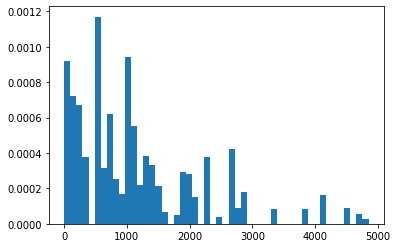

In [1137]:
plt.hist(houses_train['Healthcare_1'], bins=50, density=True)
# plt.hist(houses_train['Healthcare_1']> 1000 , bins=20, density=True, label='Healthcare_1', alpha=0.5)
plt.show()

По графику видно, что частота значений больше при наименьших значениях, заменим недостающие значения модой:

In [1138]:
houses_train['Healthcare_1'].mode()[0]

540.0

In [1139]:
houses_train.loc[(houses_train['Healthcare_1'].isna()), 'Healthcare_1'] = houses_train['Healthcare_1'].mode()[0]

Снова проверим пропуски

In [1140]:
houses_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  int64  
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  int64  
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   10000 non-null  float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Пропусков больше нет

#### Отбор и построение новых признаков
Исключим признак Id

In [1141]:
houses_train = houses_train.drop('Id', axis = 'columns')

Преобразуем категориальный признак Ecology_2, Ecology_3, Shops_2. В начале рассматривались значения этих признаков, все они имеют занчения A и B. Чтобы они не спутались, сразу переименум значения столбцов.

In [1142]:
feat_Ecology_2 = pd.get_dummies(houses_train['Ecology_2'])
feat_Ecology_2.rename(columns={"A": "Ecology_2_A", "B": "Ecology_2_B"}, inplace=True)
feat_Ecology_3 = pd.get_dummies(houses_train['Ecology_3'])
feat_Ecology_3.rename(columns={"A": "Ecology_3_A", "B": "Ecology_3_B"}, inplace=True)
feat_Shops_2 = pd.get_dummies(houses_train['Shops_2'])
feat_Shops_2.rename(columns={"A": "Shops_2_A", "B": "Shops_2_B"}, inplace=True)

Соединим получившиеся таблицы с таблицей houses_train:

In [1143]:
houses_train = pd.concat([houses_train, feat_Ecology_2, feat_Ecology_3, feat_Shops_2], axis=1)

In [1145]:
houses_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,B,...,0,11,B,184966.930730,0,1,0,1,0,1
1,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,B,...,1,16,B,300009.450063,0,1,0,1,0,1
2,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,B,...,1,3,B,220925.908524,0,1,0,1,0,1
3,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,B,...,0,5,B,175616.227217,0,1,0,1,0,1
4,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,B,...,2,4,B,150226.531644,0,1,0,1,0,1


Сохраним результирующую таблицу в файл:

In [1147]:
houses_train.to_csv('houses_train_prepared.csv', index=False, encoding='utf-8')

#### Анализ целевой переменной

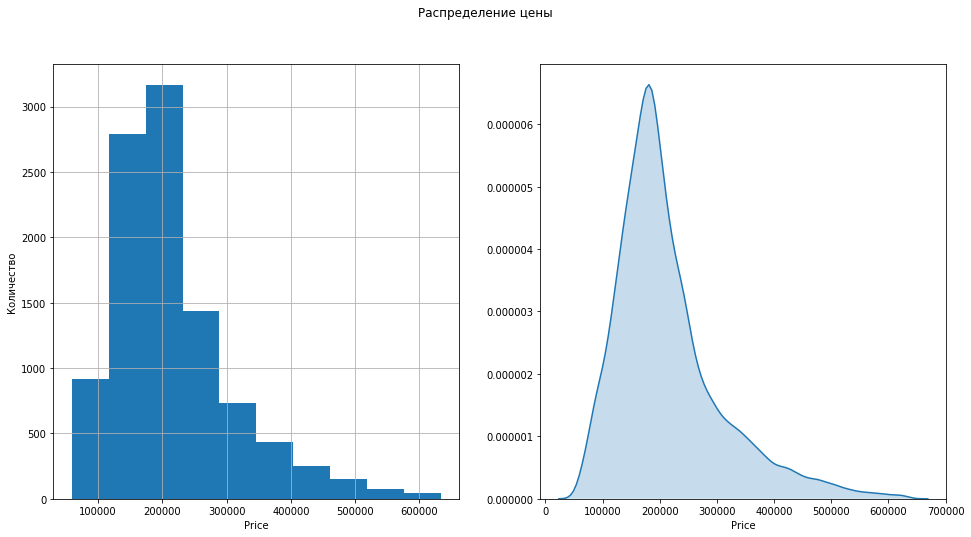

In [1172]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
houses_train['Price'].hist()
plt.ylabel('Количество')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(houses_train['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Распределение цены')
plt.show()

In [1174]:
target_mean = round(houses_train['Price'].mean(), 2)
target_median = houses_train['Price'].median()
target_mode = houses_train['Price'].mode()[0]
target_mean, target_median, target_mode

(214138.86, 192269.64487934904, 59174.77802758122)

In [1173]:
houses_train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.739874,35.510334,5.876100,8.526700,12.609400,1984.866300,0.118858,24.687000,...,853.630900,1.319500,4.231300,214138.857399,0.009700,0.990300,0.027500,0.972500,0.082500,0.917500
std,43.587592,0.839512,21.409366,18.063816,5.174014,5.241148,6.775974,18.412271,0.119025,17.532614,...,795.934381,1.493601,4.806341,92872.293865,0.098015,0.098015,0.163543,0.163543,0.275139,0.275139
min,0.000000,0.000000,2.377248,0.370619,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,42.158602,25.506959,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,...,540.000000,0.000000,1.000000,153872.633942,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,36.000000,2.000000,52.648138,32.781260,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,...,540.000000,1.000000,3.000000,192269.644879,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,75.000000,2.000000,66.005696,41.423128,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,...,990.000000,2.000000,6.000000,249135.462171,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,209.000000,19.000000,641.065193,638.163193,123.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,...,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


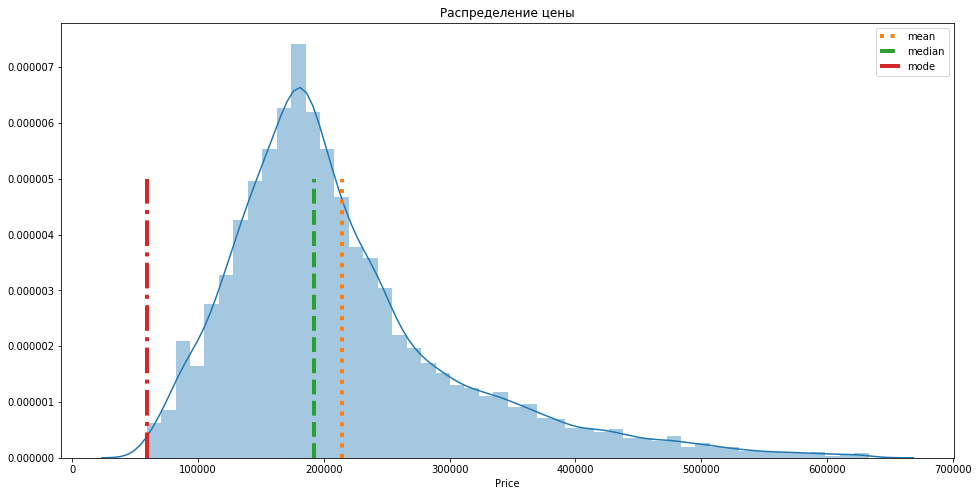

In [1215]:
plt.figure(figsize = (16, 8))

sns.distplot(houses_train['Price'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Распределение цены')
plt.legend()
plt.show()

In [1227]:
houses_train['Price'].value_counts(sort=False)

217669.112875    1
151461.942091    1
268711.924550    1
149976.604520    1
178756.205879    1
                ..
243744.360533    1
172778.615365    1
252481.908323    1
429090.881284    1
207103.209097    1
Name: Price, Length: 10000, dtype: int64

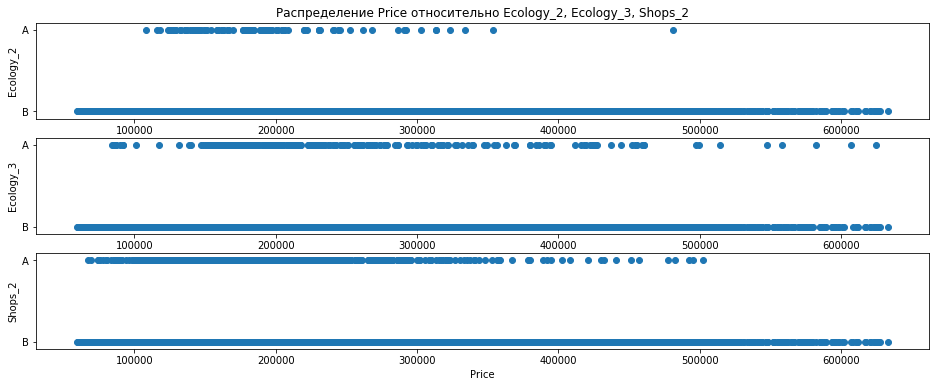

In [1211]:
plt.figure(figsize=(16, 6))

plt.subplot(311)
plt.scatter(houses_train['Price'], houses_train['Ecology_2'])
plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.title('Распределение Price относительно Ecology_2, Ecology_3, Shops_2')

plt.subplot(312)
plt.scatter(houses_train['Price'], houses_train['Ecology_3'])
plt.xlabel('Price')
plt.ylabel('Ecology_3')

plt.subplot(313)
plt.scatter(houses_train['Price'], houses_train['Shops_2'])
plt.xlabel('Price')
plt.ylabel('Shops_2')

plt.show()

По данным графикам можно лишь сказать, что количество значений А у каждого признака меньше чем количество B

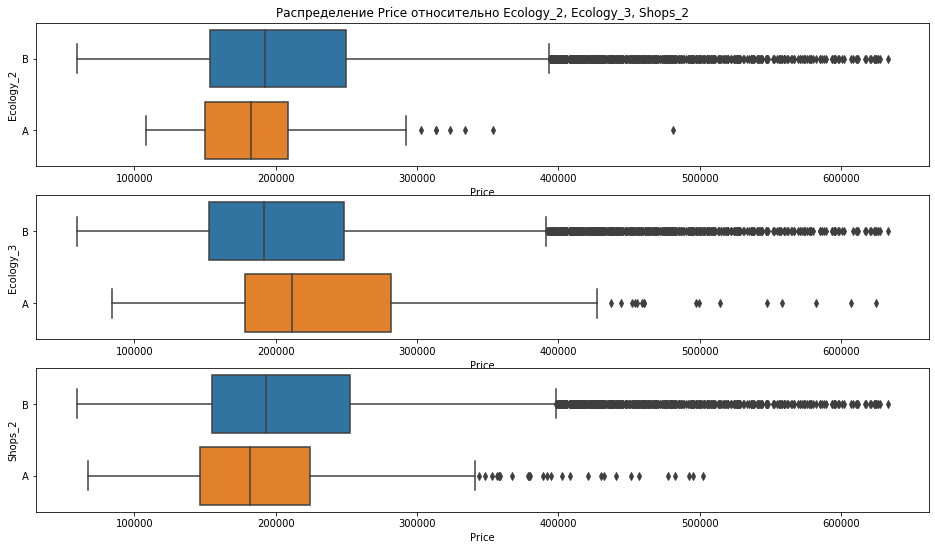

In [1228]:
plt.figure(figsize=(16, 9))

plt.subplot(311)
sns.boxplot(houses_train['Price'], houses_train['Ecology_2'])
plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.title('Распределение Price относительно Ecology_2, Ecology_3, Shops_2')

plt.subplot(312)
sns.boxplot(houses_train['Price'], houses_train['Ecology_3'])
plt.xlabel('Price')
plt.ylabel('Ecology_3')

plt.subplot(313)
sns.boxplot(houses_train['Price'], houses_train['Shops_2'])
plt.xlabel('Price')
plt.ylabel('Shops_2')

plt.show()

#### Анализ признаков

In [1233]:
ht_num_features = houses_train.select_dtypes(include=['float', 'int'])
ht_num_features.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,33,7976,5,540.0,0,11,184966.930730
1,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
2,53,2,44.947953,29.197612,0.0,8,12,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
3,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
4,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644


In [1234]:
ht_num_features.corr()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
DistrictId,1.000000,0.071432,-0.032641,-0.027851,0.185800,-0.120373,-0.149051,-0.201029,0.065294,0.246463,0.167479,0.136095,0.290681,0.306147,0.174214,0.265100
Rooms,0.071432,1.000000,0.642751,0.457219,0.109719,-0.000665,-0.029302,-0.038804,-0.032347,0.075980,0.071335,0.012811,0.043125,0.063557,0.053618,0.550291
Square,-0.032641,0.642751,1.000000,0.711193,0.102961,0.116313,0.080288,0.187742,-0.065580,-0.076493,-0.048235,0.033819,-0.039755,-0.029196,0.018857,0.506162
LifeSquare,-0.027851,0.457219,0.711193,1.000000,0.074305,0.072212,0.065394,0.171382,-0.048600,-0.077380,-0.057769,0.047305,-0.025934,-0.031827,0.022154,0.331480
KitchenSquare,0.185800,0.109719,0.102961,0.074305,1.000000,-0.011088,0.135848,0.167548,0.020167,0.278176,0.255075,-0.059306,0.088264,0.153626,0.076590,0.247940
Floor,-0.120373,-0.000665,0.116313,0.072212,-0.011088,1.000000,0.418986,0.284482,-0.016133,-0.044914,-0.016560,-0.002237,-0.113675,-0.065537,0.024264,0.128715
HouseFloor,-0.149051,-0.029302,0.080288,0.065394,0.135848,0.418986,1.000000,0.392979,-0.004362,-0.020801,0.007194,-0.008137,-0.105193,-0.068728,0.026279,0.088280
HouseYear,-0.201029,-0.038804,0.187742,0.171382,0.167548,0.284482,0.392979,1.000000,-0.066485,-0.047901,0.013664,-0.049383,-0.194639,-0.116329,-0.002132,0.036634
Ecology_1,0.065294,-0.032347,-0.065580,-0.048600,0.020167,-0.016133,-0.004362,-0.066485,1.000000,0.026464,0.009264,-0.124068,0.056582,0.030873,-0.076749,-0.058381
Social_1,0.246463,0.075980,-0.076493,-0.077380,0.278176,-0.044914,-0.020801,-0.047901,0.026464,1.000000,0.955988,0.023721,0.119390,0.524593,0.526272,0.263286


Высокая корреляция (>0.95) у признаков Social_1 и Social_2

Построим тепловую матрицу корреляций

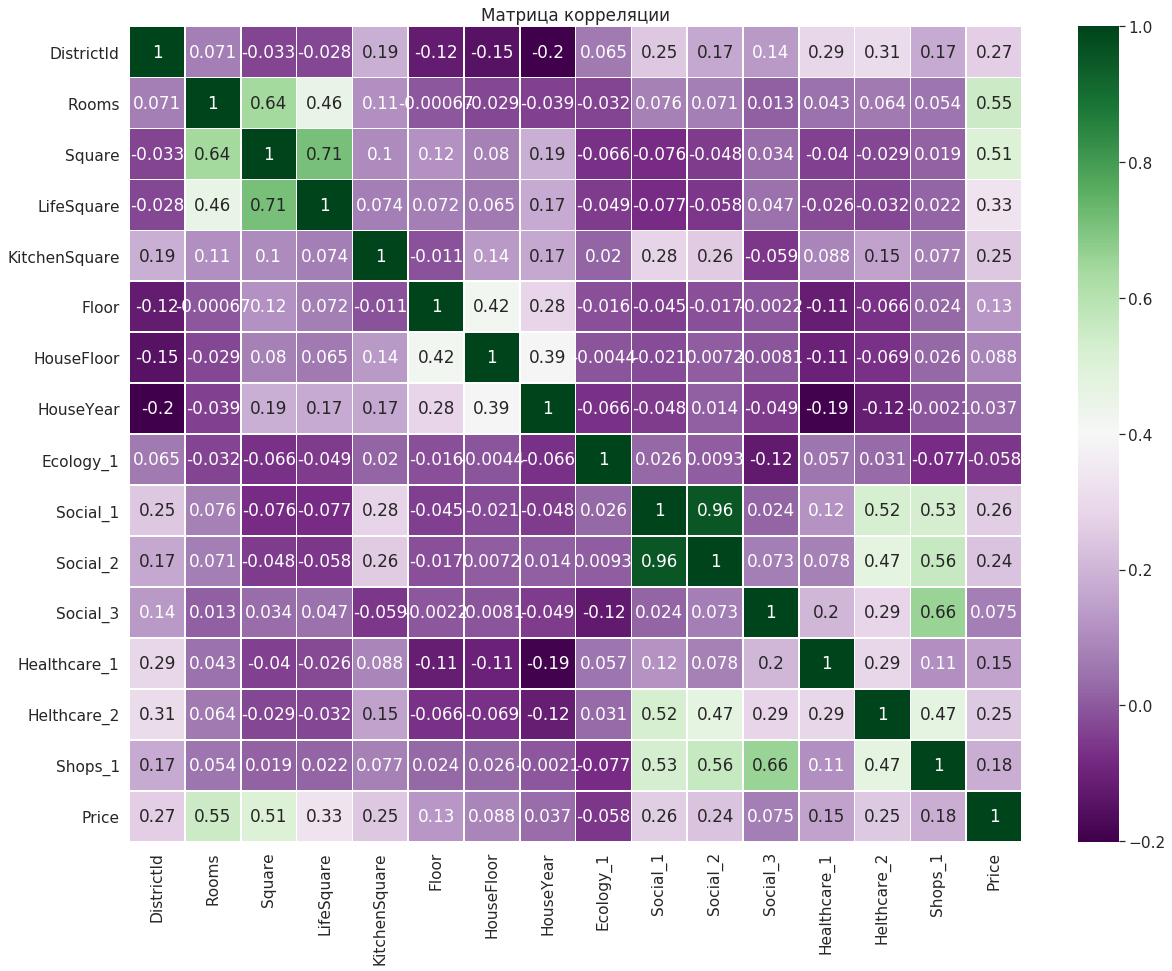

In [1249]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(ht_num_features.corr(), annot=True, linewidths=.5, cmap='PRGn')

plt.title('Матрица корреляции')
plt.show()

In [ ]:
Построим распределения, проверим корреляции

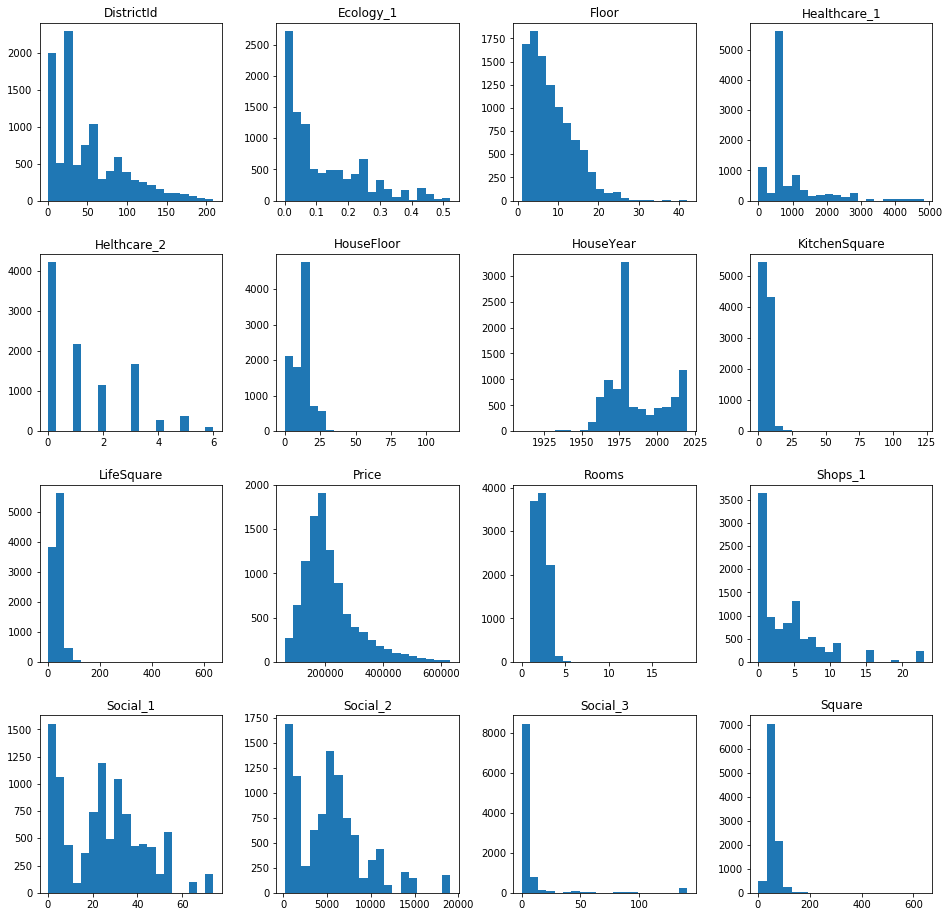

In [1236]:
ht_num_features.hist(figsize=(16,16), bins=20, grid=False);

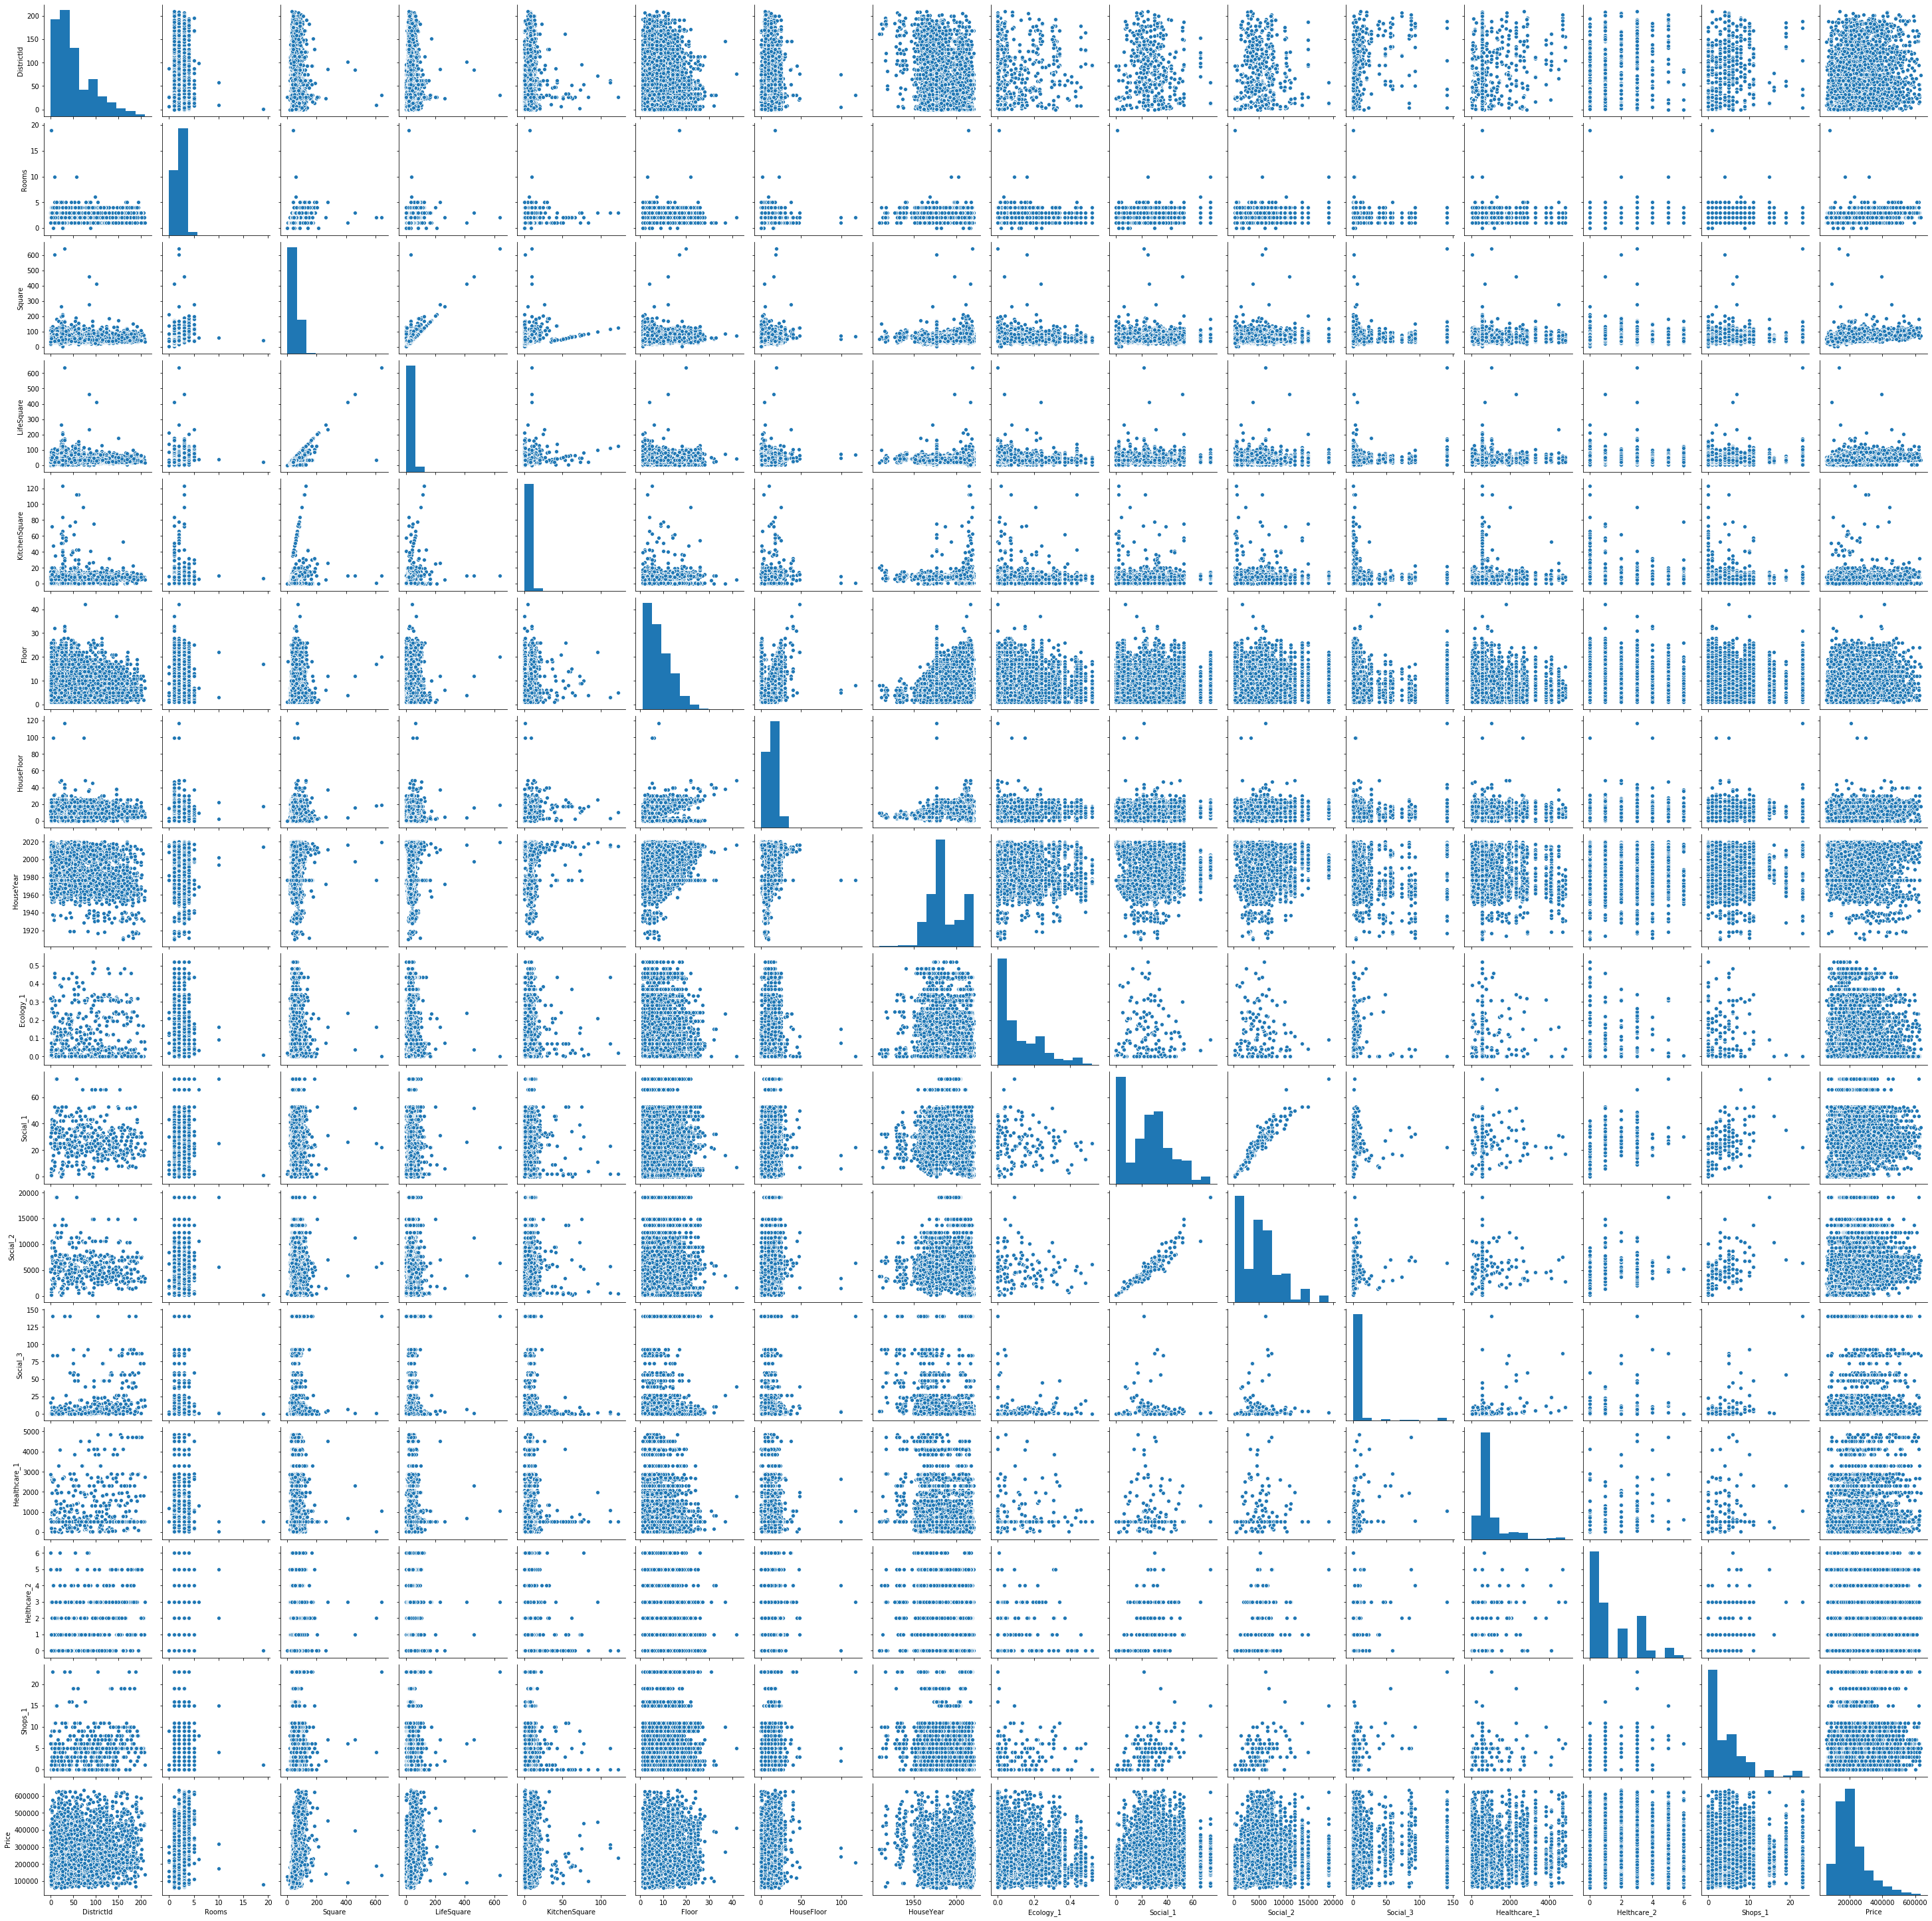

In [1237]:
sns.pairplot(ht_num_features)
plt.show()

Линейная зависимость видна у признаков Social_1 и Social_2 и менее выраженная у LifeSquare и Square - коэффициент корреляции 0.71

Построим представление корреляции для этих признаков

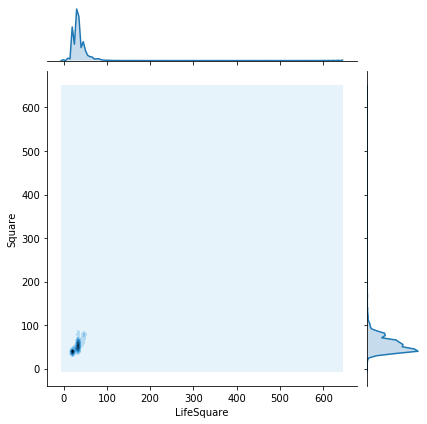

In [1244]:
sns.jointplot(ht_num_features['LifeSquare'], ht_num_features['Square'],kind='kde')

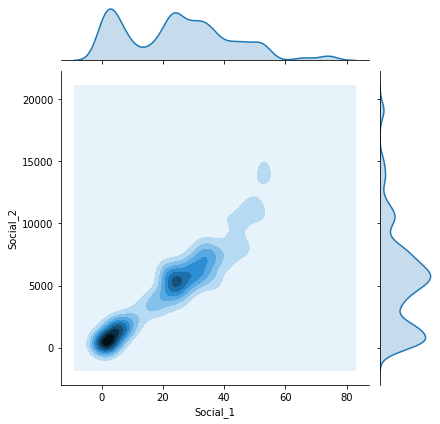

In [1245]:
sns.jointplot(ht_num_features['Social_1'], ht_num_features['Social_2'],kind='kde')